In [8]:
from matplotlib import pyplot as plt
import json
import numpy as np
import pandas as pd
from collections import OrderedDict

pcolors = OrderedDict([('blue', [0.00, 0.33, 0.66]),
                       ('green', [0.33, 0.66, 0.00]),
                       ('red', [0.66, 0.00, 0.00]),
                       ('cyan', [0.00, 0.66, 0.66]),
                       ('grey', [0.25, 0.5, 0.5]),
                       ('purple', [0.33, 0.00, 0.66]),
                       ('orange', [0.7, 0.4, 0.00])])

plt.rcParams['figure.figsize'] = (3.3, 2)
plt.rcParams['figure.dpi'] = 240
plt.rcParams['font.family'] = 'Open Sans'
plt.rcParams['font.size'] = 8
plt.rcParams['axes.titlesize'] = 'medium'
plt.rcParams['axes.labelsize'] = 'medium'
plt.rcParams['axes.linewidth'] = 0.5
plt.rcParams['xtick.labelsize'] = 'small'
plt.rcParams['ytick.labelsize'] = 'small'
plt.rcParams['legend.fontsize'] = 'small'
plt.rcParams['lines.linewidth'] = 0.75
plt.rcParams['lines.markersize'] = 4
plt.rcParams['lines.markeredgewidth'] = 0.5
plt.rcParams['legend.fontsize'] = 'small'
plt.rcParams['legend.frameon'] = False
plt.rcParams['patch.linewidth'] = 0.5
plt.rcParams['svg.fonttype'] = 'none'
plt.rcParams['savefig.edgecolor'] = 'None'
plt.rcParams['savefig.facecolor'] = 'None'
plt.rcParams['savefig.dpi'] = 600

%matplotlib inline

rc = %config InlineBackend.rc
rc['savefig.dpi'] = 150

In [2]:
# setup 
instance = '20a'
policy = 'edge-policy'
p_range = [0.6, 0.7, 0.8, 0.9, 1.0]
num_particles = 1000

train_range = [1, 2, 5, 10, 20, 50, 100, 200, 500, 1000, 2000, 5000, 10000, 20000, 100000]
test_episodes = 1000
rho = 0.1
gamma = 0.9
kappa = 0.5

baseline_types = ['optimistic-agent']

results_dir = '../results/ctp/'

In [3]:
# load instance
instances = json.load(open('../resources/ctp/instances.json', 'r'))

In [4]:
# load baselines
baseline_path = '%s/ctp-%s-%s-p%.1f-test%d.json' 
baselines = {}
for b in baseline_types:
    baselines[b] = {}
    for p in p_range:
        try:
            filename = baseline_path % (results_dir,b,instance,p,test_episodes)
            baselines[b][p] = json.load(open(filename, 'r'))
            #print '.',
            print b, p
        except:
           pass        

optimistic-agent 0.6
optimistic-agent 0.7
optimistic-agent 0.8
optimistic-agent 0.9
optimistic-agent 1.0


In [5]:
# load trials
trial_path = '%s/ctp-%s-%s-p%.1f-rho%.1f-gamma%.1f-kappa%.1f-n%04d-steps%05d-test%d.json' 
trials = {}
for p in p_range:
    trials[p] = {}
    for n in train_range:
        try:
            filename = trial_path % (results_dir,policy,instance,p,rho,gamma,kappa,num_particles,n,test_episodes)
            trials[p][n] = json.load(open(filename, 'r'))
            #print '.',
            print p, n
        except:
            pass        

0.6 1
0.6 2
0.6 5
0.6 10
0.6 20
0.6 50
0.6 100
0.6 200
0.6 500
0.6 1000
0.7 1
0.7 2
0.7 5
0.7 10
0.7 20
0.7 50
0.7 100
0.7 200
0.7 500
0.7 1000
0.8 1
0.8 2
0.8 5
0.8 10
0.8 20
0.8 50
0.8 100
0.8 200
0.8 500
0.8 1000
0.9 1
0.9 2
0.9 5
0.9 10
0.9 20
0.9 50
0.9 100
0.9 200
0.9 500
0.9 1000
1.0 1
1.0 2
1.0 5
1.0 10
1.0 20
1.0 50
1.0 100
1.0 200
1.0 500
1.0 1000


In [6]:
def plot_graph(instance, weights=None, axis=None, **kwargs):
    kwargs = dict(kwargs)
    if axis is None:
        axis = plt.gca()
    linewidth = kwargs.get('linewidth', 1.0)
    nodes = np.array(instance['nodes'])
    graph = np.array(instance['graph'])
    # plot edges
    for i, edges in enumerate(graph):
        for j,_ in edges:
            x = [nodes[i,0], nodes[j,0]] 
            y = [nodes[i,1], nodes[j,1]] 
            if not weights is None:
                kwargs['linewidth'] = weights.get((min(i,j), max(i,j)), 0.0) * linewidth
            plt.plot(x, y, **kwargs)
    # plot nodes
    kw = dict(kwargs)
    kw['s'] = (1.5 * linewidth)**2
    plt.scatter(nodes[:,0],nodes[:,1],**kw)
    # mark start and end
    s = instance['s']
    kw['s'] = (2.0 * linewidth)**2
    kw['color'] = pcolors['green']
    plt.scatter(nodes[[s,],0],nodes[[s,],1],zorder=np.inf,**kw)
    t = instance['t']
    kw['color'] = pcolors['red']
    plt.scatter(nodes[[t,],0],nodes[[t,],1],zorder=np.inf,**kw)
    ax.margins(tight=True)
    xmin, xmax = nodes[:,0].min(), nodes[:,0].max()
    ymin, ymax = nodes[:,1].min(), nodes[:,1].max()
    w =  xmax - xmin 
    h = ymax - ymin
    ax.set_xlim([xmin-0.03*w, xmax+0.03*w])
    ax.set_ylim([ymin-0.03*h, ymax+0.03*h])
    #ax.set_aspect('equal')
    plt.axis('off')
    
def plot_path(indices, instance, axis=None, *args, **kwargs):
    if axis is None:
        axis = plt.gca()
    nodes = np.array(instance['nodes'])
    plt.plot(nodes[indices][:,0], nodes[indices][:,1], **kwargs)

../plots/ctp/ctp_travel_graph_20a_edge-policy_0.6_1000.png
../plots/ctp/ctp_travel_graph_20a_edge-policy_0.6_1000.pdf
../plots/ctp/ctp_travel_graph_20a_edge-policy_0.6_1000.svg
../plots/ctp/ctp_travel_graph_20a_edge-policy_0.7_1000.png
../plots/ctp/ctp_travel_graph_20a_edge-policy_0.7_1000.pdf
../plots/ctp/ctp_travel_graph_20a_edge-policy_0.7_1000.svg
../plots/ctp/ctp_travel_graph_20a_edge-policy_0.8_1000.png
../plots/ctp/ctp_travel_graph_20a_edge-policy_0.8_1000.pdf
../plots/ctp/ctp_travel_graph_20a_edge-policy_0.8_1000.svg
../plots/ctp/ctp_travel_graph_20a_edge-policy_0.9_1000.png
../plots/ctp/ctp_travel_graph_20a_edge-policy_0.9_1000.pdf
../plots/ctp/ctp_travel_graph_20a_edge-policy_0.9_1000.svg
../plots/ctp/ctp_travel_graph_20a_edge-policy_1.0_1000.png
../plots/ctp/ctp_travel_graph_20a_edge-policy_1.0_1000.pdf
../plots/ctp/ctp_travel_graph_20a_edge-policy_1.0_1000.svg


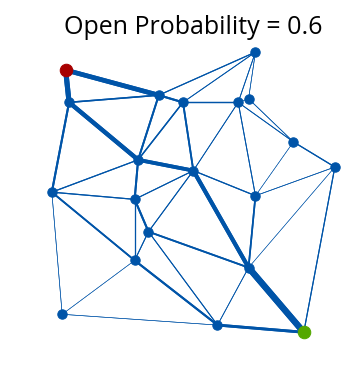

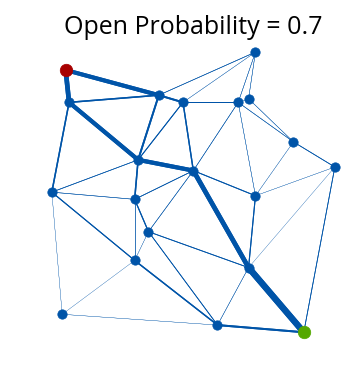

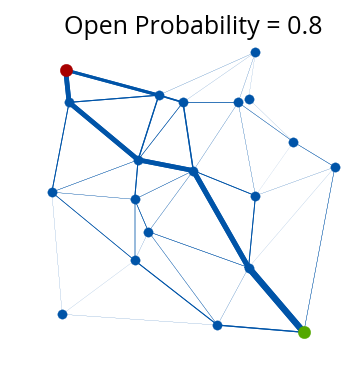

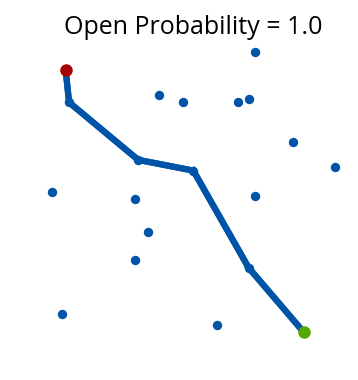

In [9]:
for p in sorted(trials.keys()):
    n = np.max(trials[p].keys())
    trial = trials[p][n] 
    # get map of edge weights
    max_count = 1.0 * np.max(trial['counts'].values())
    weights = dict((tuple(trial['edges'][k]), trial['counts'][k] / max_count)
                   for k in trial['counts'])
    fig = plt.figure(figsize=(2.0,2.2))
    ax = fig.add_axes([0,0.0,1.0,0.9], frameon=False)
    plot_graph(instances[instance], weights, 
           axis=ax, linewidth=3.0, color=pcolors['blue'])
    ax.set_title('Open Probability = %.1f' % p, fontsize=12)
    #fig.tight_layout()
    for ext in ['png','pdf','svg']:
        plotfile = '../plots/ctp/ctp_travel_graph_%s_%s_%.1f_%04d.%s' % (instance,policy,p,num_particles,ext)
        print plotfile
        fig.savefig(plotfile,
                    bbox_inches='tight', dpi=600)    

In [13]:
# get traveled distance for each trail
distances = pd.DataFrame(dict(((p,n), trials[p][n]['distances']) 
                              for p in trials for n in trials[p]))

writing: ../plots/ctp/ctp_distance_vs_steps_edge-policy_20a_1000.png
writing: ../plots/ctp/ctp_distance_vs_steps_edge-policy_20a_1000.pdf
writing: ../plots/ctp/ctp_distance_vs_steps_edge-policy_20a_1000.svg


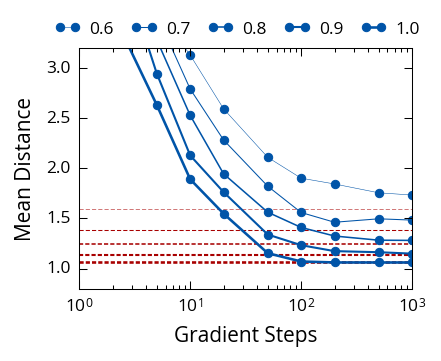

In [14]:
fig = plt.figure(figsize=(2.75,2))
ax = fig.gca()
for w,p in enumerate(p_range):
    mean_reward = distances[p].mean()
    std_reward = distances[p].std()
    for b in baselines:
        if p in baselines[b]:
            mean_baseline = np.mean(baselines[b][p]['distances'])
            ax.semilogx((mean_reward.index[0],mean_reward.index[-1]),
                        (mean_baseline, mean_baseline),
                        dashes = (2,1), 
                        color = pcolors['red'], 
                        linewidth = 0.25 * (w + 1))
    ax.semilogx(mean_reward.index,
                mean_reward.values,
                '-o',
                color = pcolors['blue'], mec = pcolors['blue'],
                linewidth = 0.25 * (w  + 1),
                label = '%.1f' % p)
        
ax.set_xlabel('Gradient Steps')
ax.set_ylabel('Mean Distance')
ax.set_xlim([0, 1000])
ax.set_ylim([0.8, 3.2])
lgd =ax.legend(bbox_to_anchor=(0.3, 1.075, 0.77, .10), ncol=5, 
               handlelength=1.5, handletextpad=0.5, columnspacing=1.0)

fig.tight_layout(pad=0.05)
for ext in ['png','pdf','svg']:
    plotfile = '../plots/ctp/ctp_distance_vs_steps_%s_%s_%04d.%s' % (policy,instance,num_particles,ext)
    print 'writing:', plotfile
    fig.savefig(plotfile,
                bbox_extra_artists=(lgd,), bbox_inches='tight', 
                dpi=600,facecolor='w',edgecolor='w')